# Load packages
We will use mediapipe as a pretrained model.

In [ ]:
!pip install mediapipe opencv-python-headless matplotlib

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from google.colab.patches import cv2_imshow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.8/34.8 MB 17.8 MB/s eta 0:00:00


In [ ]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True, min_detection_confidence=0.5)

Let's load our dataset from drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Create a pose detection model

In [ ]:
import cv2

image_path = '/content/drive/My Drive/images/099864788.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Failed to read the image. Check the file path.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


Let's try mediapipe on an image:

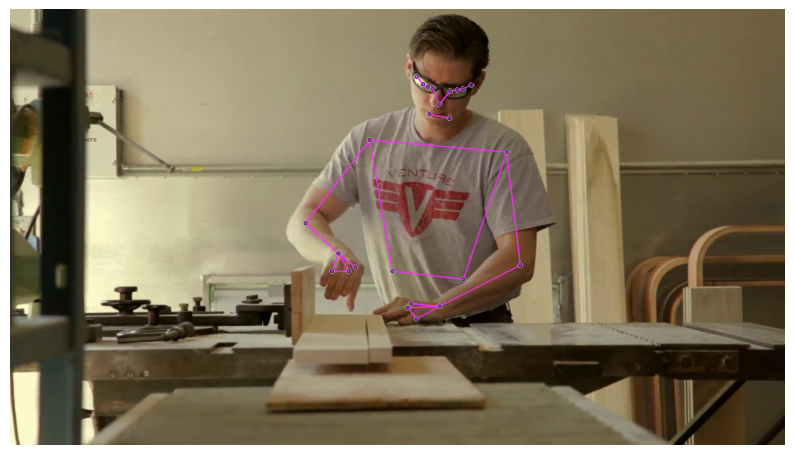

In [ ]:
import mediapipe as mp
import matplotlib.pyplot as plt

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True)

with pose as p:
    results = p.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

mp_drawing = mp.solutions.drawing_utils
annotated_image = image.copy()
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
    )

plt.figure(figsize=[10, 10])
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Load landmarks to use on 3D space:

Pose landmarks detected.


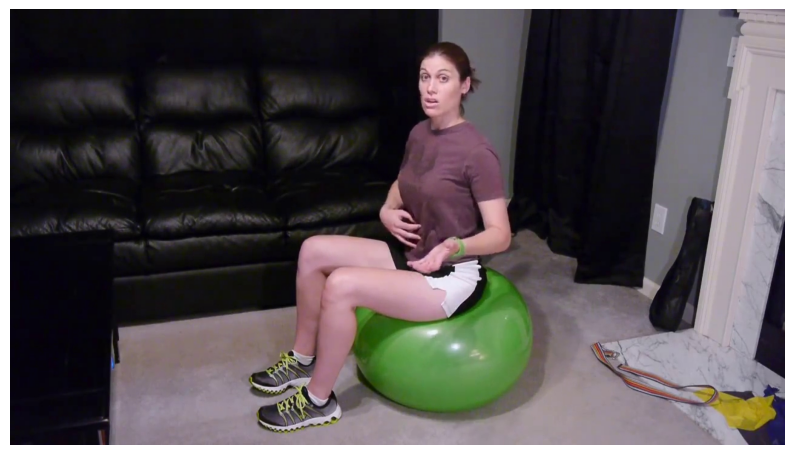

In [ ]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def detect_pose_in_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to read the image from {image_path}")
        return None
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    return results

another_image_path = '/content/drive/My Drive/images/099712450.jpg'
results = detect_pose_in_image(another_image_path)
image = plt.imread(another_image_path)
if results.pose_landmarks:
    print("Pose landmarks detected.")
else:
    print("No pose landmarks detected.")
plt.figure(figsize=[10, 10])
plt.imshow(image)
plt.axis('off')
plt.show()

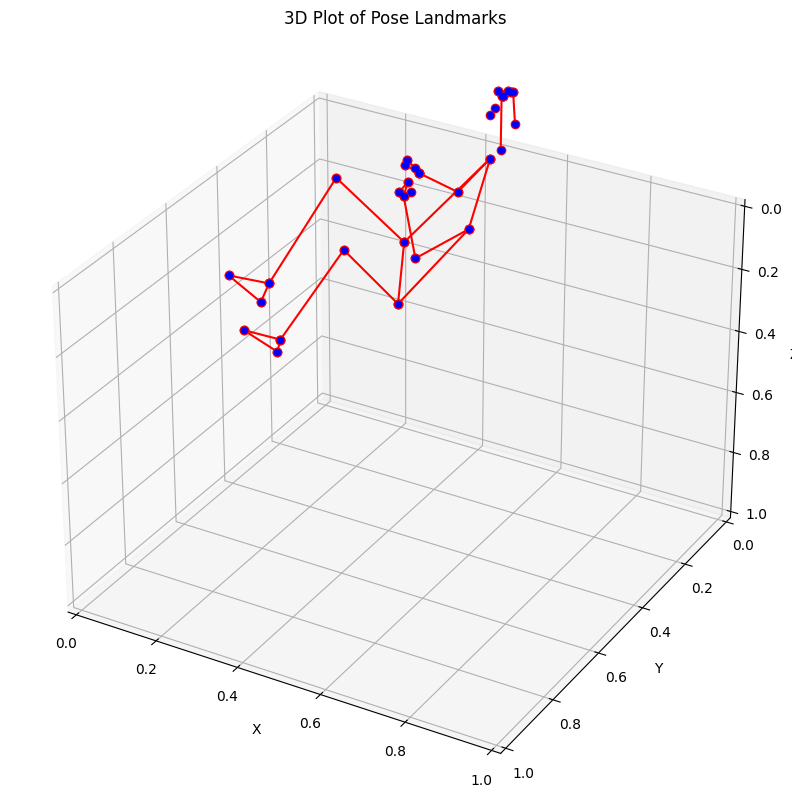

In [ ]:
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Plot of Pose Landmarks')

    pose_connections = mp_pose.POSE_CONNECTIONS

    for connection in pose_connections:
        start_idx, end_idx = connection
        start_point = landmarks[start_idx]
        end_point = landmarks[end_idx]
        ax.plot([start_point.x, end_point.x], [start_point.y, end_point.y], [start_point.z, end_point.z], 'ro-')

    for landmark in landmarks:
        ax.scatter(landmark.x, landmark.y, landmark.z, color='blue')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.invert_zaxis()
    ax.invert_yaxis()

    plt.show()
else:
    print("No landmarks detected.")

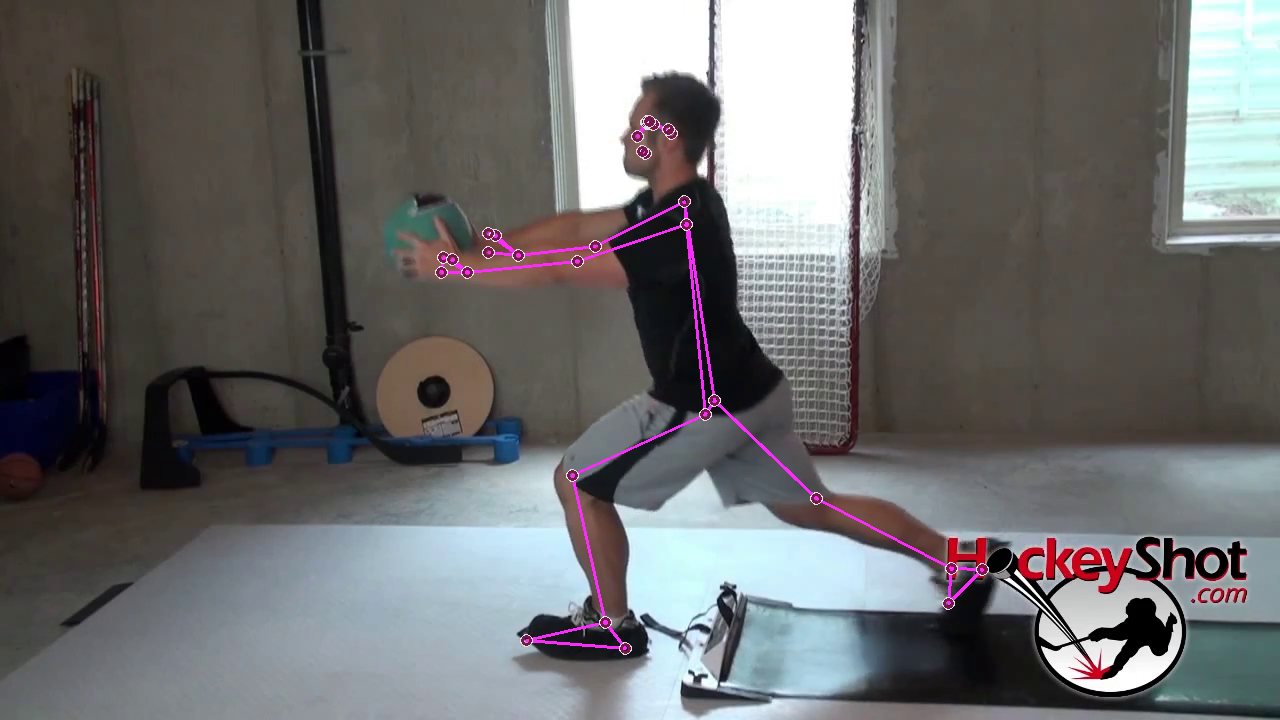

In [ ]:
def detect_and_plot_pose(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to read the image from {image_path}. Check if the path is correct.")
        return
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    if results.pose_landmarks:
        image_with_landmarks = image_rgb.copy()
        mp_drawing.draw_landmarks(
            image_with_landmarks,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
        )
        cv2_imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_RGB2BGR))
    else:
        print("No pose landmarks detected.")

detect_and_plot_pose('/content/drive/My Drive/images/099615290.jpg')

In [ ]:
import numpy as np

def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    angle = np.arctan2(y3 - y2, x3 - x2) - np.arctan2(y1 - y2, x1 - x2)
    angle = np.abs(angle)

    angle = np.degrees(angle)

    if angle > 180:
        angle = 360 - angle

    return angle

# Estimating different poses
In this part we try to estimate Sitting, Standing, Downward Dog, Lying and T-posing poses

## Standing:

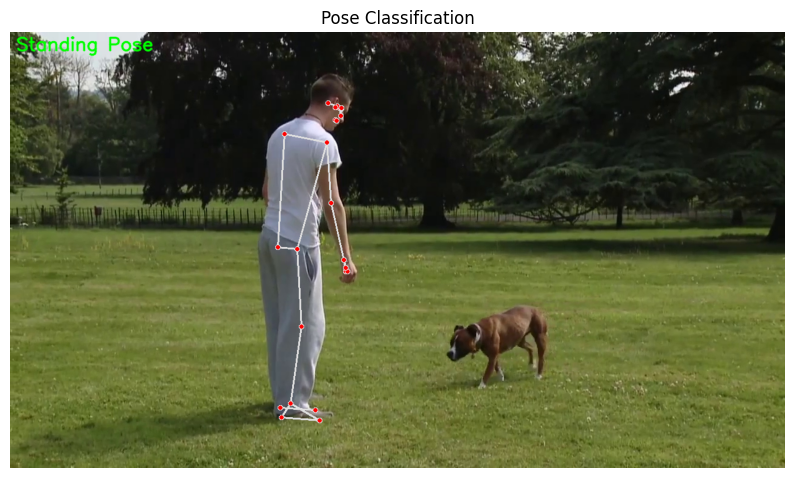

In [ ]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1.x, landmark1.y, landmark1.z
    x2, y2, _ = landmark2.x, landmark2.y, landmark2.z
    x3, y3, _ = landmark3.x, landmark3.y, landmark3.z

    vector1 = np.array([x1 - x2, y1 - y2])
    vector2 = np.array([x3 - x2, y3 - y2])

    unit_vector1 = vector1 / np.linalg.norm(vector1)
    unit_vector2 = vector2 / np.linalg.norm(vector2)

    dot_product = np.dot(unit_vector1, unit_vector2)
    angle = np.arccos(dot_product)

    angle = np.degrees(angle)

    return angle

def classifyStandingPose(landmarks, output_image, display=False):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

    shoulder_angle_threshold = 10
    hip_angle_threshold = 10
    knee_angle_threshold = 10

    shoulder_level_diff = abs(left_shoulder.y - right_shoulder.y)
    hip_level_diff = abs(left_hip.y - right_hip.y)

    left_knee_angle = calculateAngle(left_hip, left_knee, left_ankle)
    right_knee_angle = calculateAngle(right_hip, right_knee, right_ankle)

    left_leg_straight = 160 < left_knee_angle < 180
    right_leg_straight = 160 < right_knee_angle < 180

    if (shoulder_level_diff < shoulder_angle_threshold and
        hip_level_diff < hip_angle_threshold and
        left_leg_straight and
        right_leg_straight):
        label = "Standing Pose"
    else:
        label = "Unknown Pose"

    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.title("Pose Classification")
        plt.axis('off')
        plt.show()

def process_and_classify_image(image_path):
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read the image from {image_path}")
            return

        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if results.pose_landmarks:
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            classifyStandingPose(results.pose_landmarks.landmark, annotated_image, display=True)
        else:
            print("No pose detected.")

image_path = "/content/drive/My Drive/pose/Validation/standing/007417620.jpg"
process_and_classify_image(image_path)

## Sitting:

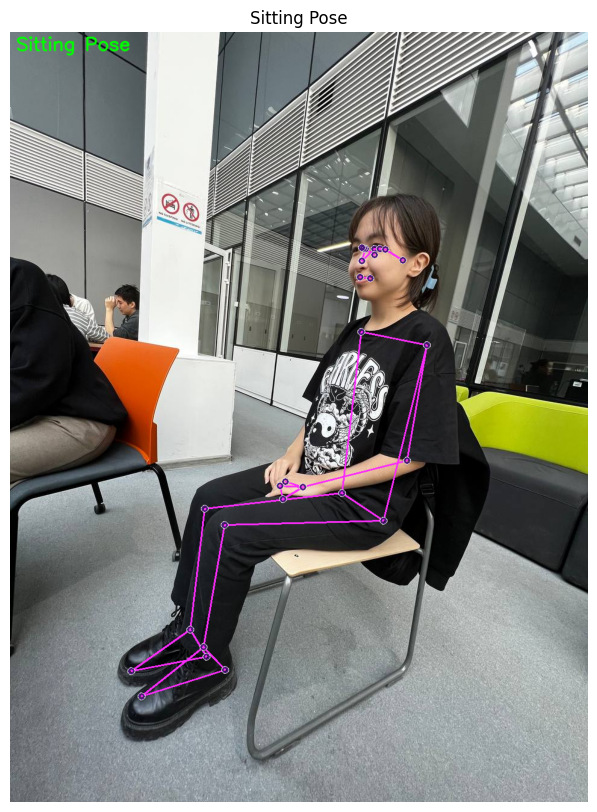

In [ ]:
def calculateDistance(landmark1, landmark2):
    x1, y1 = landmark1.x, landmark1.y
    x2, y2 = landmark2.x, landmark2.y
    distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

def classifySittingPose(landmarks, output_image, display=False):
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

    knee_angle_threshold = 160

    left_knee_angle = calculateAngle(left_hip, left_knee, left_ankle)
    right_knee_angle = calculateAngle(right_hip, right_knee, right_ankle)

    hips_above_knees = left_hip.y < left_knee.y and right_hip.y < right_knee.y
    knees_bent = left_knee_angle < knee_angle_threshold and right_knee_angle < knee_angle_threshold

    if hips_above_knees and knees_bent:
        label = "Sitting Pose"
    else:
        label = "Unknown Pose"

    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')
        plt.show()

def process_and_classify_image(image_path):
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read the image from {image_path}")
            return

        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.pose_landmarks:
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
            )
            classifySittingPose(results.pose_landmarks.landmark, annotated_image, display=True)
        else:
            print("No pose detected.")

image_path = "/content/drive/My Drive/pose/Validation/sitting/saltanat.jpg"
process_and_classify_image(image_path)

## Lying:

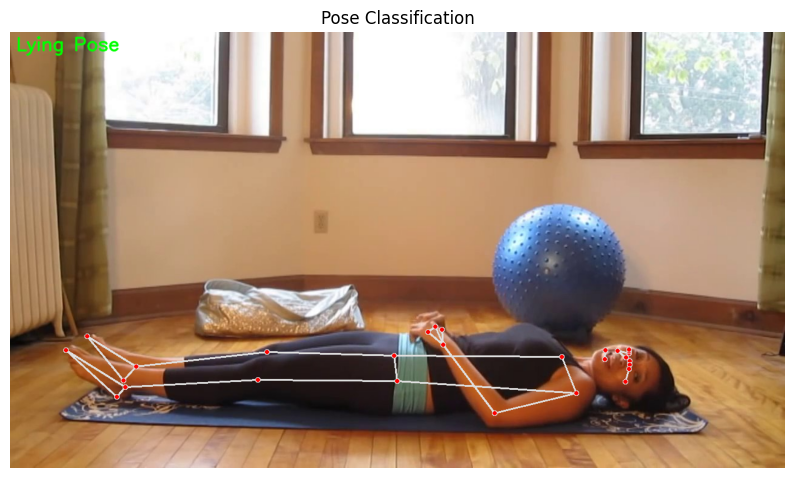

In [ ]:
def classifyLyingPose(landmarks, output_image, display=False):
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

    hip_to_shoulder_angle_threshold = 45
    shoulder_to_ankle_angle_threshold = 45

    hip_to_shoulder_angle_diff = abs(left_hip.y - left_shoulder.y)
    shoulder_to_ankle_angle_diff = abs(left_shoulder.y - left_ankle.y)

    if (hip_to_shoulder_angle_diff < hip_to_shoulder_angle_threshold and
        shoulder_to_ankle_angle_diff < shoulder_to_ankle_angle_threshold):
        label = "Lying Pose"
    else:
        label = "Unknown Pose"

    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.title("Pose Classification")
        plt.axis('off')
        plt.show()
    else:
        return output_image, label

def process_and_classify_image(image_path):
    image = cv2.imread(image_path)

    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if results.pose_landmarks:
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(
                annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            classifyLyingPose(results.pose_landmarks.landmark, annotated_image, display=True)
        else:
            print("No pose detected.")

image_path = "/content/drive/My Drive/pose/Validation/lying/1709636049.jpeg"
process_and_classify_image(image_path)


## Downward Dog:

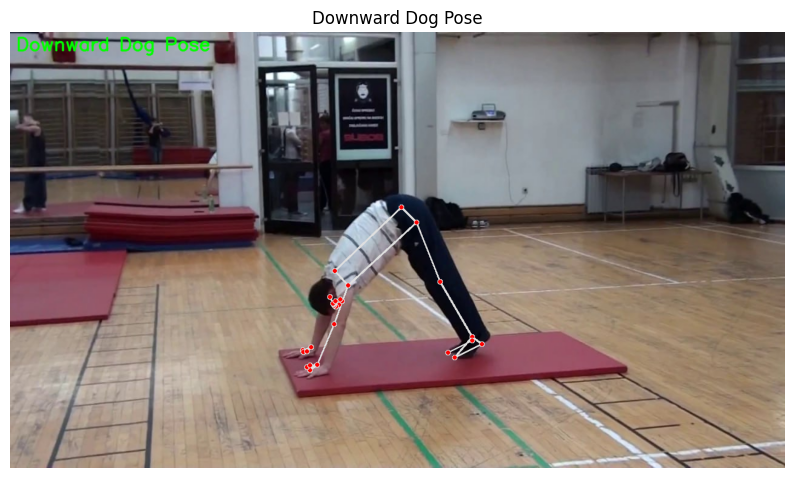

In [ ]:
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    if angle > 180:
        angle = 360 - angle
    return angle

def classifyDownwardDogPose(landmarks, output_image):
    landmarks = [(landmark.x, landmark.y) for landmark in landmarks]
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

    left_arm_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
    right_arm_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
    left_leg_angle = calculate_angle(left_hip, left_knee, left_ankle)
    right_leg_angle = calculate_angle(right_hip, right_knee, right_ankle)

    arms_straight = left_arm_angle > 160 and right_arm_angle > 160
    legs_straight = left_leg_angle > 160 and right_leg_angle > 160
    hips_highest = left_hip[1] < left_shoulder[1] and right_hip[1] < right_shoulder[1] and \
                   left_hip[1] < left_knee[1] and right_hip[1] < right_knee[1]

    inverted_v_shape = arms_straight and legs_straight and hips_highest

    if inverted_v_shape:
        label = "Downward Dog Pose"
    else:
        label = "Unknown Pose"

    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    return output_image, label

def process_and_classify_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found or unable to read.")
        return

    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if results.pose_landmarks:
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            output_image, label = classifyDownwardDogPose(results.pose_landmarks.landmark, annotated_image)
            plt.figure(figsize=[10,10])
            plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
            plt.title(label)
            plt.axis('off')
            plt.show()
        else:
            print("No pose detected.")

image_path = "/content/drive/My Drive/pose/Validation/downwarddog/1709635593.jpeg"
process_and_classify_image(image_path)

## T-pose

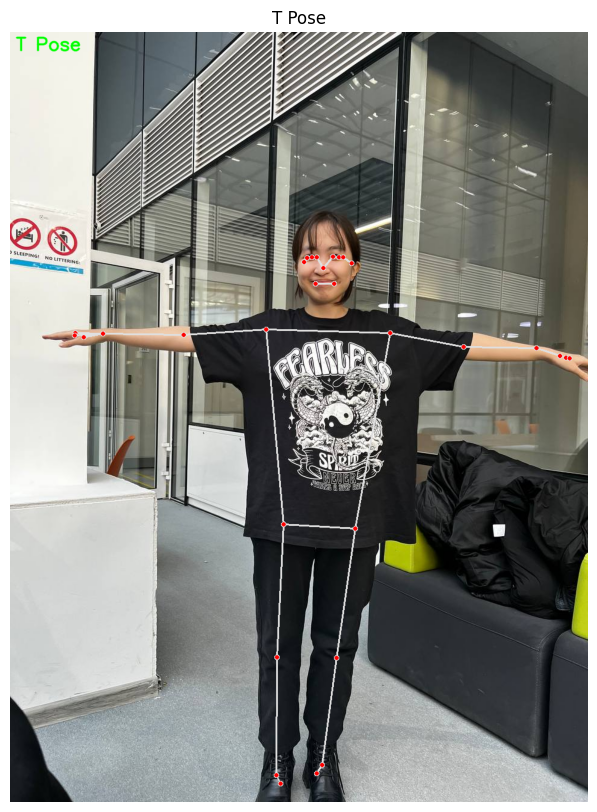

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def is_horizontal(level1, level2, threshold=0.1):
    return abs(level1 - level2) < threshold

def classifyTPose(landmarks, output_image, display=False):
    landmarks = [(landmark.x, landmark.y) for landmark in landmarks]
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]

    wrists_aligned_with_shoulders = (is_horizontal(left_wrist[1], left_shoulder[1]) and
                                     is_horizontal(right_wrist[1], right_shoulder[1]))

    shoulders_aligned = is_horizontal(left_shoulder[1], right_shoulder[1], threshold=0.05)

    body_upright = (is_horizontal(left_hip[1], right_hip[1], threshold=0.1) and
                    is_horizontal(left_shoulder[1], right_shoulder[1], threshold=0.1))

    if wrists_aligned_with_shoulders and shoulders_aligned and body_upright:
        label = "T Pose"
    else:
        label = "Unknown Pose"

    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')
        plt.show()

    return output_image, label

def process_and_classify_image(image_path, pose_function):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found or unable to read.")
        return

    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if results.pose_landmarks:
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            output_image, label = pose_function(results.pose_landmarks.landmark, annotated_image, True)
        else:
            print("No pose detected.")

image_path = "/content/drive/My Drive/pose/Validation/tpose/1709639031.jpeg"
process_and_classify_image(image_path, classifyTPose)

# Testing model
Lest take a picture and estimate the pose using camera:

<IPython.core.display.Javascript object>

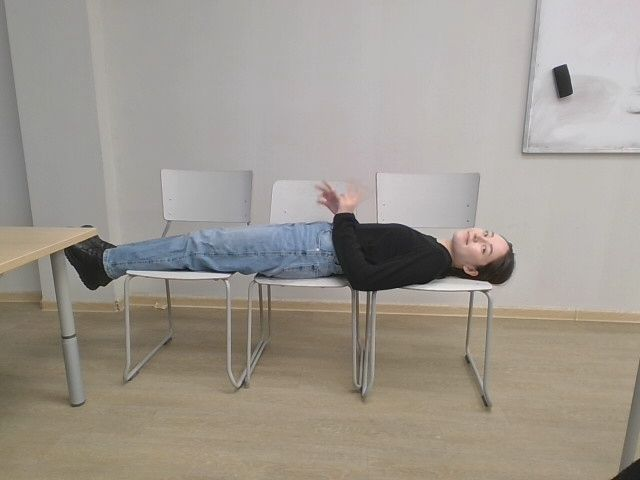

In [ ]:
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
import base64
from io import BytesIO
from PIL import Image
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = base64.b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

photo_filename = take_photo()

# Display the captured photo
from IPython.display import Image
display(Image(photo_filename))

Pose classified as: Lying Pose


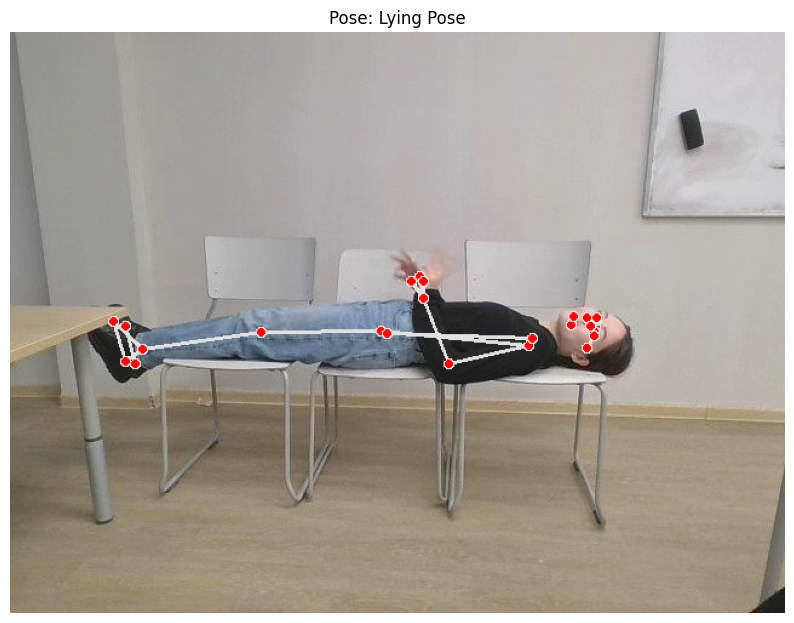

In [ ]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1.x, landmark1.y, landmark1.z
    x2, y2, _ = landmark2.x, landmark2.y, landmark2.z
    x3, y3, _ = landmark3.x, landmark3.y, landmark3.z

    vector1 = np.array([x1 - x2, y1 - y2])
    vector2 = np.array([x3 - x2, y3 - y2])

    unit_vector1 = vector1 / np.linalg.norm(vector1)
    unit_vector2 = vector2 / np.linalg.norm(vector2)

    dot_product = np.dot(unit_vector1, unit_vector2)
    angle = np.arccos(dot_product)

    angle = np.degrees(angle)

    return angle

def classify_pose(landmarks):
    label = "Unknown Pose"

    if classifyDownwardDogPose(landmarks):
        label = "Downward Dog Pose"
    elif classifySittingPose(landmarks):
        label = "Sitting Pose"
    elif classifyTPose(landmarks):
        label = "T Pose"
    elif classifyLyingPose(landmarks):
        label = "Lying Pose"
    elif classifyStandingPose(landmarks):
        label = "Standing Pose"



    return label


def classifyTPose(landmarks):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]

    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])

    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])

    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    total1 = (left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195)
    total2 = (left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110)

    return (total1 and total2) or total1 or total2

def classifyStandingPose(landmarks):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

    distance_threshold = 0.1
    angle_threshold = 20

    left_arm_angle = calculateAngle(left_shoulder, left_elbow, left_wrist)
    right_arm_angle = calculateAngle(right_shoulder, right_elbow, right_wrist)
    arms_downward = left_arm_angle > 150 and right_arm_angle > 150

    legs_aligned = abs(left_knee.x - right_knee.x) < 0.1

    return (arms_downward and legs_aligned) or legs_aligned


def classifySittingPose(landmarks):
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

    knees_bent = ((left_knee_angle < 125 or left_knee_angle > 215) and (right_knee_angle < 125 or right_knee_angle > 215))

    return knees_bent

def classifyDownwardDogPose(landmarks):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

    distance_threshold = 0.1
    angle_threshold = 90

    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

    knees_straight = left_knee_angle > 165 and left_knee_angle < 195 and right_knee_angle > 165 and right_knee_angle < 195

    belly_angle_left = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                 landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                 landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value])

    belly_bent = belly_angle_left < 130 and belly_angle_left > 75
    return belly_bent and knees_straight

def classifyLyingPose(landmarks):
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    right_knee = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]
    right_ankle = landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value]

    body_flat_on_ground = abs(left_shoulder.y - left_hip.y) < 0.1 and \
                          abs(right_shoulder.y - right_hip.y) < 0.1 and \
                          abs(left_knee.y - left_ankle.y) < 0.1 and \
                          abs(right_knee.y - right_ankle.y) < 0.1

    arms_by_side = abs(left_shoulder.x - left_elbow.x) < 0.1 and \
                   abs(right_shoulder.x - right_elbow.x) < 0.1 and \
                   abs(left_elbow.x - left_wrist.x) < 0.1 and \
                   abs(right_elbow.x - right_wrist.x) < 0.1

    return body_flat_on_ground

def process_and_classify_image(image_path):
    image = cv2.imread(image_path)

    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if results.pose_landmarks:
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            pose_label = classify_pose(results.pose_landmarks.landmark)
            print(f"Pose classified as: {pose_label}")

            plt.figure(figsize=[10,10])
            plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Pose: {pose_label}")
            plt.axis('off')
            plt.show()
        else:
            print("No pose detected.")

photo_filename = "photo.jpg"
process_and_classify_image(photo_filename)

# End
As you can see we can determine 5 different poses now using camera.
Thank you for attention.